# Project 1: Exploratory Data Analysis of Car Speeding and Warning Signs
### Do drivers slow down after seeing a warning sign?
### using data from Mr. Graham Amis, Cambridgeshire County Council, U.K. 
<p>obtained from  Pau Fonseca i Casas, Department of Statistics and Operations Research, Universitat Politècnica de Catalunya Barcelona, 08034, SPAIN <a href="pau@fib.upc.edu">pau@fib.upc.edu<a>

<a href="http://www-eio.upc.edu/~pau/cms/rdata/datasets.html">R Datasets:</a> <a href="http://www-eio.upc.edu/~pau/cms/rdata/csv/boot/amis.csv">(amis Data)</a>  <a href="http://www-eio.upc.edu/~pau/cms/rdata/doc/boot/amis.html">(amis Documentation)</a>

<p><p><a href="mailto:sdutky@gmail.com">Steve Dutky</a>  DATA201 Spring 2019

## Data Description:
### Overview
"In a study into the effect that warning signs have on speeding patterns, Cambridgeshire County Council considered 14 pairs of locations. The locations were paired to account for factors such as traffic volume and type of road. One site in each pair had a sign erected warning of the dangers of speeding and asking drivers to slow down. No action was taken at the second site. Three sets of measurements were taken at each site. Each set of measurements was nominally of the speeds of 100 cars but not all sites have exactly 100 measurements. These speed measurements were taken before the erection of the sign, shortly after the erection of the sign, and again after the sign had been in place for some time."  <a href="http://www-eio.upc.edu/~pau/cms/rdata/doc/boot/amis.html">(amis Documentation)</a>

The underlying assumption is that the locations in each pair are equivalent:  the location without a warning sign (referenced hereafter as Ctl for Control) can serve as the baseline benchmark for the corresponding location at which a sign was erected (Sbj for Subject).  We shall test this assumption.

### Details
The data consists of a <a href="http://www-eio.upc.edu/~pau/cms/rdata/csv/boot/amis.csv">csv file</a> of 8437 rows (excluding header) and <a href="http://www-eio.upc.edu/~pau/cms/rdata/doc/boot/amis.html">4 columns</a>:
    
#### "speed
* Speeds of cars (in miles per hour).

#### period
* A numeric column indicating the time that the reading was taken. A value of 1 indicates a reading taken before the sign was erected, a 2 indicates a reading taken shortly after erection of the sign and a 3 indicates a reading taken after the sign had been in place for some time.

#### warning
*  numeric column indicating whether the location of the reading was chosen to have a warning sign erected. A value of 1 indicates presence of a sign [Sbj] and a value of 2 indicates that no sign was erected [Ctl].

#### pair
* A numeric column giving the pair number at which the reading was taken. Pairs were numbered from 1 to 14.<B>"</B>





## Interactive Python:


#### Initialization:

In [1]:
## import packages:
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
from scipy import stats #  library of statistical functions

#
# Set seed for generating psuedo random numbers
np.random.seed(12345678)
#
# Set up graphics
plt.style.use('classic')
%matplotlib inline

#### Import Traffic Dataset from Web Url

In [2]:
df=pd.read_csv('http://www-eio.upc.edu/~pau/cms/rdata/csv/boot/amis.csv')
#
#check columns
df.columns


Index(['Unnamed: 0', 'speed', 'period', 'warning', 'pair'], dtype='object')

In [3]:
#get rid of unamed column not referenced in documentation
df.drop(columns=['Unnamed: 0'], inplace=True)
#
# The data contain no missing values.  To illustrate the handling of missing data
# insert Nan at random row and column positions
#
randCols=[ random.randint(0,(df.shape[1]-1)) for x in range(0,10) ] # ten random columns
randRows=random.sample(range(0,df.shape[0]),10)
#
for i in range(0, len(randCols)) :
    df.iloc[randRows[i],randCols[i]]=np.nan


#### Summarize Dataframe

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,8433.0,37.822483,6.508126,19.0,33.0,37.0,42.0,67.0
period,8435.0,2.004386,0.817380,1.0,1.0,2.0,3.0,3.0
warning,8435.0,1.506698,0.499985,1.0,1.0,2.0,2.0,2.0
pair,8435.0,7.560403,4.030003,1.0,4.0,8.0,11.0,14.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8437 entries, 0 to 8436
Data columns (total 4 columns):
speed      8433 non-null float64
period     8435 non-null float64
warning    8435 non-null float64
pair       8435 non-null float64
dtypes: float64(4)
memory usage: 263.7 KB


#### Eliminate Nan's from Dataframe and Resummarize

In [6]:
df.dropna(inplace=True) # drop all rows with Nan's
df.describe().T # basic stats

,count,mean,std,min,25%,50%,75%,max
speed,8427.0,37.824374,6.508900,19.0,33.0,37.0,42.0,67.0
period,8427.0,2.004747,0.817403,1.0,1.0,2.0,3.0,3.0
warning,8427.0,1.506705,0.499985,1.0,1.0,2.0,2.0,2.0
pair,8427.0,7.557731,4.029571,1.0,4.0,8.0,11.0,14.0


In [7]:
df.info() # summarize DataFrame object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8427 entries, 0 to 8436
Data columns (total 4 columns):
speed      8427 non-null float64
period     8427 non-null float64
warning    8427 non-null float64
pair       8427 non-null float64
dtypes: float64(4)
memory usage: 329.2 KB


## How equivalent are the Sbj and Ctl locations?

We look at the speeds observed for period 1 before any warning signs are erected.  We would expect these to have similar distributions at Sbj and Ctl locations both over all pairs and at each individual pair. To check if this is so, we use the T test from scipy.ttest_ind() to obtain a t-score and probability for each set of Sbj and Ctl speeds that we compare.  Low t-scores and low probabilities indicate that there is no significant difference between the distributions of speeds with a high degree of confidence.

In [8]:
tt=pd.DataFrame(columns=['pair','meanSbj','varSbj','meanCtl','varCtl','tScore','pValue'])
a=df.speed[(df.period==1) & (df.warning==1)]
b=df.speed[(df.period==1) & (df.warning==2) ]
t,p=stats.ttest_ind(a,b,equal_var=(np.var(a)==np.var(b)))
tt.loc[0]=['all',np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
for i in range(1,15):
      a=df.speed[(df.period==1) & (df.warning==1) & (df.pair==i)]
      b=df.speed[(df.period==1) & (df.warning==2) & (df.pair==i)]
      t,p=stats.ttest_ind(a,b,equal_var=(np.var(a)==np.var(b)))
      tt.loc[i]=[i,np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
print(tt)

   pair    meanSbj     varSbj    meanCtl     varCtl     tScore        pValue
0   all  36.511445  35.860742  38.215462  43.464671  -7.149583  1.109034e-12
1     1  34.530000  24.889100  34.170000  27.821100   0.493370  6.222996e-01
2     2  38.950000  31.367500  30.250000  15.227500  12.681400  1.262034e-26
3     3  32.220000  20.111600  37.950000  33.487500  -7.787418  4.606666e-13
4     4  36.414141  32.161820  37.950000  33.487500  -1.881356  6.139869e-02
5     5  36.610000  24.497900  38.750000  21.327500  -3.145417  1.915359e-03
6     6  40.130000  24.373100  38.750000  21.327500   2.031121  4.358542e-02
7     7  29.860000  16.460400  42.140000  22.720400 -19.519978  1.441880e-47
8     8  38.350000  24.427500  38.090000  23.421900   0.373984  7.088168e-01
9     9  38.050000  25.727500  40.747475  23.845322  -3.802681  1.908872e-04
10   10  33.950000  24.387500  34.020000  29.759600  -0.094652  9.246882e-01
11   11  34.620000  23.335600  32.181818  14.714417   3.925103  1.215089e-04

## How equivalent are the Sbj and Ctl locations?  Not very.

The results don't give us much comfort that locations are equivalent.  Where the t-scores are low, the probabilities are high, indicating that the t-score well could have resulted from chance.

With a few modifications, we can use the same code to compare the Ctl locations at the other different periods:



In [9]:
tt=pd.DataFrame(columns=['pair','meanCtlp1','varCtlp1','meanCtlp2','varCtlp2','tScore','pValue'])
a=df.speed[(df.period==1) & (df.warning==2)]
b=df.speed[(df.period==2) & (df.warning==2) ]
t,p=stats.ttest_ind(a,b,equal_var=(len(a)==len(b)))
tt.loc[0]=['all',np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
for i in range(1,15):
      a=df.speed[(df.period==1) & (df.warning==2) & (df.pair==i)]
      b=df.speed[(df.period==2) & (df.warning==2) & (df.pair==i)]
      t,p=stats.ttest_ind(a,b,equal_var=(len(a)==len(b)))
      tt.loc[i]=[i,np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
print(tt)

   pair  meanCtlp1   varCtlp1  meanCtlp2   varCtlp2    tScore        pValue
0   all  38.215462  43.464671  39.148069  46.031724 -3.683991  2.339718e-04
1     1  34.170000  27.821100  38.650000  29.787500 -5.872891  1.784015e-08
2     2  30.250000  15.227500  35.000000  34.620000 -6.694059  2.184098e-10
3     3  37.950000  33.487500  36.490000  41.649900  1.675878  9.534046e-02
4     4  37.950000  33.487500  36.490000  41.649900  1.675878  9.534046e-02
5     5  38.750000  21.327500  38.790000  23.525900 -0.059426  9.526724e-01
6     6  38.750000  21.327500  38.717172  23.233139  0.048802  9.611266e-01
7     7  42.140000  22.720400  42.190000  22.373900 -0.074084  9.410180e-01
8     8  38.090000  23.421900  36.910000  21.941900  1.743191  8.285262e-02
9     9  40.747475  23.845322  37.470000  15.349100  5.192792  5.368904e-07
10   10  34.020000  29.759600  35.070000  28.365100 -1.370334  1.721342e-01
11   11  32.181818  14.714417  35.120000  18.205600 -5.083679  8.642779e-07
12   12  40.

Again, the T-test shows either a significant difference between the observed speeds at periods 1 and 2 in the Ctl locations, or less significant differences of low confidence.   There could be many factors (ie. season, weather, time of day) that could affect this but these are not detailed.

For completeness we can compare the Ctl locations speed distributions for periods 1 and 3 and for periods 2 and 3:

In [10]:
tt=pd.DataFrame(columns=['pair','meanCtlp1','varCtlp1','meanCtlp3','varCtlp3','tScore','pValue'])
a=df.speed[(df.period==1) & (df.warning==2)]
b=df.speed[(df.period==3) & (df.warning==2) ]
t,p=stats.ttest_ind(a,b,equal_var=(len(a)==len(b)))
tt.loc[0]=['all',np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
for i in range(1,15):
      a=df.speed[(df.period==1) & (df.warning==2) & (df.pair==i)]
      b=df.speed[(df.period==3) & (df.warning==2) & (df.pair==i)]
      t,p=stats.ttest_ind(a,b,equal_var=(len(a)==len(b)))
      tt.loc[i]=[i,np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
print(tt)

   pair  meanCtlp1   varCtlp1  meanCtlp3   varCtlp3    tScore        pValue
0   all  38.215462  43.464671  39.536949  40.319143 -5.464206  5.051825e-08
1     1  34.170000  27.821100  36.260000  30.852400 -2.714832  7.216597e-03
2     2  30.250000  15.227500  35.820000  25.087600 -8.728486  1.068977e-15
3     3  37.950000  33.487500  38.560000  25.666400 -0.789143  4.309723e-01
4     4  37.950000  33.487500  36.000000  27.505882  2.389971  1.786965e-02
5     5  38.750000  21.327500  40.510000  21.309900 -2.681853  7.939732e-03
6     6  38.750000  21.327500  41.360000  28.670400 -3.672673  3.088070e-04
7     7  42.140000  22.720400  41.450000  22.387500  1.022211  3.079285e-01
8     8  38.090000  23.421900  40.070000  40.445100 -2.465157  1.454676e-02
9     9  40.747475  23.845322  38.200000  19.820000  3.825185  1.758446e-04
10   10  34.020000  29.759600  38.688889  43.836543 -5.242477  4.579283e-07
11   11  32.181818  14.714417  35.100000  20.430000 -5.803832  2.178506e-08
12   12  40.

In [11]:
tt=pd.DataFrame(columns=['pair','meanCtlp2','varCtlp2','meanCtlp3','varCtlp3','tScore','pValue'])
a=df.speed[(df.period==2) & (df.warning==2)]
b=df.speed[(df.period==3) & (df.warning==2) ]
t,p=stats.ttest_ind(a,b,equal_var=(len(a)==len(b)))
tt.loc[0]=['all',np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
for i in range(1,15):
      a=df.speed[(df.period==2) & (df.warning==2) & (df.pair==i)]
      b=df.speed[(df.period==3) & (df.warning==2) & (df.pair==i)]
      t,p=stats.ttest_ind(a,b,equal_var=(len(a)==len(b)))
      tt.loc[i]=[i,np.mean(a),np.var(a),np.mean(b),np.var(b),t,p]
print(tt)

   pair  meanCtlp2   varCtlp2  meanCtlp3   varCtlp3    tScore    pValue
0   all  39.148069  46.031724  39.536949  40.319143 -1.583592  0.113398
1     1  38.650000  29.787500  36.260000  30.852400  3.053770  0.002571
2     2  35.000000  34.620000  35.820000  25.087600 -1.055885  0.292307
3     3  36.490000  41.649900  38.560000  25.666400 -2.510313  0.012863
4     4  36.490000  41.649900  36.000000  27.505882  0.566500  0.571750
5     5  38.790000  23.525900  40.510000  21.309900 -2.555840  0.011343
6     6  38.717172  23.233139  41.360000  28.670400 -3.641652  0.000347
7     7  42.190000  22.373900  41.450000  22.387500  1.100519  0.272442
8     8  36.910000  21.941900  40.070000  40.445100 -3.980683  0.000096
9     9  37.470000  15.349100  38.200000  19.820000 -1.224785  0.222111
10   10  35.070000  28.365100  38.688889  43.836543 -4.100052  0.000064
11   11  35.120000  18.205600  35.100000  20.430000  0.037361  0.970233
12   12  43.520000  26.749600  43.080000  28.313600  0.589983  0

Again, the results are not impressive for what would like to see in a control set. As before the differences may originate from factors of which we have no clue.

# Graphical Presentation of the Data

## Reshaping the Data
Currently data are represented in long format the rows have very different meanings.  This makes it difficult to plot and analyse.  We want to reshape them in a wider, more convenient form.  This would take the form of a new dataframe where each row will have these columns:
    
####  pair 
* The numeric id of an 'equivalent' Sbj/Ctl pair where, as above, the Sbj location will have a warning sign installed while the Ctl location will not.

#### SbjBefore
* The speed observed at the Sbj location before the warning sign was installed.

#### SbjAfter
* The speed observed at the Sbj location shortly after the warning sign was installed.

#### SbjLongAfter
* The speed observed at the Sbj location long after the warning sign was installed.

#### CtlBefore
* The speed observed at the Ctl location before the warning sign was installed at the Sbj location.

#### CtlAfter
* The speed observed at the Ctl location shortly after the warning sign was installed at the Sbj location.

#### CtlLongAfter
* The speed observed at the Ctl location long after the warning sign was installed at the Sbj location.



### Count the number of observations of each kind

This requires an equal number of observations across all columns.  We know from the data description that attempted to collect 100 observations at each period at both locations in each pair, but that they fell short of this in a number of locations.  Additionally we aggravated this by introducing and eliminating Nan's in the data by dropping the rows that contained them.

Our first step is to see the extent of the problems by counting the observations in our current dataframe, df, for every combination of pair, warning, and period:

In [12]:
cc=pd.DataFrame(columns=['pair','SbjBefore','SbjAfter','SbjLongAfter','CtlBefore','CtlAfter','CtlLongAfter'])
template=pd.DataFrame(np.zeros([1,len(cc.columns)]),columns=cc.columns,index=[0])

for p in range(1,15):
    cc=pd.concat([cc,template],ignore_index=True)
    cc.iloc[p-1].pair=p
    cc.iloc[p-1].SbjBefore=len(df.pair[(df.pair==p)&(df.warning==1)&(df.period==1)])
    cc.iloc[p-1].SbjAfter=len(df.pair[(df.pair==p)&(df.warning==1)&(df.period==2)])
    cc.iloc[p-1].SbjLongAfter=len(df.pair[(df.pair==p)&(df.warning==1)&(df.period==3)])

    cc.iloc[p-1].CtlBefore=len(df.pair[(df.pair==p)&(df.warning==2)&(df.period==1)])
    cc.iloc[p-1].CtlAfter=len(df.pair[(df.pair==p)&(df.warning==2)&(df.period==2)])
    cc.iloc[p-1].CtlLongAfter=len(df.pair[(df.pair==p)&(df.warning==2)&(df.period==3)])

print(cc)


    
    


    pair  SbjBefore  SbjAfter  SbjLongAfter  CtlBefore  CtlAfter  CtlLongAfter
0    1.0      100.0      99.0          99.0      100.0     100.0         100.0
1    2.0      100.0     100.0         100.0      100.0     100.0         100.0
2    3.0      100.0     100.0          97.0      100.0     100.0         100.0
3    4.0       99.0     100.0          82.0      100.0     100.0          85.0
4    5.0      100.0     100.0          83.0      100.0     100.0         100.0
5    6.0      100.0     100.0         100.0      100.0      99.0         100.0
6    7.0      100.0     100.0         100.0      100.0     100.0         100.0
7    8.0      100.0     100.0         100.0      100.0     100.0         100.0
8    9.0      100.0     100.0         100.0       99.0     100.0         100.0
9   10.0      100.0     100.0         100.0      100.0     100.0          90.0
10  11.0      100.0     100.0         100.0       99.0     100.0         200.0
11  12.0      100.0     100.0         100.0      100

In [13]:
#

### Wherever there are not 100 observations of speed we want to stretch out or shrink what is there.

We create a function to do this using scipy's interpolate package:

In [14]:
import scipy.interpolate as interp #  library for interpolating arrays

def stretchShrink(ar, size):
     ar=np.sort(ar)
     if len(ar)==size:
         return ar 
     arInterp=interp.interp1d(np.arange(len(ar)),ar)
     return arInterp(np.linspace(0,len(ar)-1,size))


#### Build a skeleton for the new dataframe

In [15]:
tidyDf=pd.concat([template]*(14*100),ignore_index=True) # shape 1400x7
tidyDf.pair=np.repeat(np.arange(14)+1,100)  # allocate 100 rows for each pair
tidyDf.describe()

,pair,SbjBefore,SbjAfter,SbjLongAfter,CtlBefore,CtlAfter,CtlLongAfter
count,1400.000000,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0
mean,7.500000,0.0,0.0,0.0,0.0,0.0,0.0
std,4.032569,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,7.500000,0.0,0.0,0.0,0.0,0.0,0.0
75%,11.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,14.000000,0.0,0.0,0.0,0.0,0.0,0.0


#### Populate tidyDf with speed values for Sbj and Ctl for each pair:

In [16]:
for p in range(1,15):
    tidyDf.loc[tidyDf.pair==p,'SbjBefore']=stretchShrink(df[(df.pair==p)&(df.period==1)&(df.warning==1)].speed,100)
    tidyDf.loc[tidyDf.pair==p,'SbjAfter']=stretchShrink(df[(df.pair==p)&(df.period==2)&(df.warning==1)].speed,100)
    tidyDf.loc[tidyDf.pair==p,'SbjLongAfter']=stretchShrink(df[(df.pair==p)&(df.period==3)&(df.warning==1)].speed,100)
    tidyDf.loc[tidyDf.pair==p,'CtlBefore']=stretchShrink(df[(df.pair==p)&(df.period==1)&(df.warning==2)].speed,100)
    tidyDf.loc[tidyDf.pair==p,'CtlAfter']=stretchShrink(df[(df.pair==p)&(df.period==2)&(df.warning==2)].speed,100)
    tidyDf.loc[tidyDf.pair==p,'CtlLongAfter']=stretchShrink(df[(df.pair==p)&(df.period==3)&(df.warning==2)].speed,100)

tidyDf.describe()




,pair,SbjBefore,SbjAfter,SbjLongAfter,CtlBefore,CtlAfter,CtlLongAfter
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,7.500000,36.513377,35.773593,37.648470,38.217518,39.155209,39.810678
std,4.032569,5.989907,6.100189,6.356963,6.596591,6.792004,6.353256
min,1.000000,22.000000,19.000000,20.000000,20.000000,22.000000,22.000000
25%,4.000000,32.000000,31.000000,33.000000,34.000000,34.000000,35.000000
50%,7.500000,36.000000,35.000000,37.000000,38.000000,38.000000,39.000000
75%,11.000000,40.000000,40.000000,42.000000,42.000000,43.000000,44.000000
max,14.000000,58.000000,63.000000,60.000000,65.000000,67.000000,61.000000


### How far wrong is it to stretch or shrink the original number of observations?
#### We apply t-tests to see how far different they are:

In [17]:
def doTtest(pair,tidyName,dfColumn):
    if len(dfColumn)==100:
        return False
    a=tidyDf.loc[tidyDf.pair==pair,tidyName]
    tscore,pval=stats.ttest_ind(a,dfColumn)
    print('pair:',pair,tidyName,'orig len',len(dfColumn),tscore,pval)
    return  True
#
for p in range(1,15):
    doTtest(p,'SbjBefore',df[(df.pair==p)&(df.period==1)&(df.warning==1)].speed)
    doTtest(p,'SbjAfter',df[(df.pair==p)&(df.period==2)&(df.warning==1)].speed)
    doTtest(p,'SbjLongAfter',df[(df.pair==p)&(df.period==3)&(df.warning==1)].speed)
#
    doTtest(p,'CtlBefore',df[(df.pair==p)&(df.period==1)&(df.warning==2)].speed)
    doTtest(p,'CtlAfter',df[(df.pair==p)&(df.period==2)&(df.warning==2)].speed)
    doTtest(p,'CtlLongAfter',df[(df.pair==p)&(df.period==3)&(df.warning==2)].speed)


pair: 1 SbjAfter orig len 99 0.0 1.0
pair: 1 SbjLongAfter orig len 99 0.0 1.0
pair: 3 SbjLongAfter orig len 97 0.00021170846811282768 0.9998312975061728
pair: 4 SbjBefore orig len 99 0.0 1.0
pair: 4 SbjLongAfter orig len 82 -0.0024918436261811656 0.9980145579717439
pair: 4 CtlLongAfter orig len 85 -0.0035126669698047988 0.9972011292405271
pair: 5 SbjLongAfter orig len 83 0.0015727246399194629 0.9987468798276018
pair: 6 CtlAfter orig len 99 0.0 1.0
pair: 9 CtlBefore orig len 99 -1.0214557706264586e-14 0.9999999999999918
pair: 10 CtlLongAfter orig len 90 -0.0012550004374465686 0.9989999854762568
pair: 11 CtlBefore orig len 99 0.0 1.0
pair: 11 CtlLongAfter orig len 200 0.02593138421425135 0.9793294235844308
pair: 13 SbjLongAfter orig len 99 -1.263363252364776e-14 0.99999999999999
pair: 13 CtlBefore orig len 99 -7.472980329876802e-15 0.999999999999994
pair: 13 CtlAfter orig len 99 0.0 1.0
pair: 14 SbjBefore orig len 99 0.0 1.0


### Plot histograms of the worst case Pair 11, CtlLongAfter

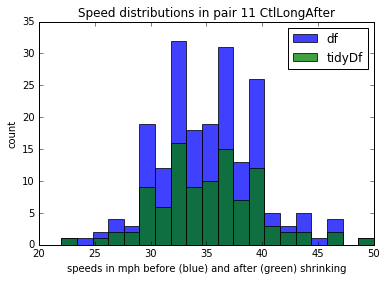

In [18]:
fig, ax = plt.subplots()

ax.set_title('Speed distributions in pair 11 CtlLongAfter')
ax.set_xlabel('speeds in mph before (blue) and after (green) shrinking')
ax.set_ylabel('count')
a=ax.hist(df[(df.pair==11) & (df.period==3)&(df.warning==2)].speed,label='df', bins=20,alpha=.75)
a=ax.hist(tidyDf.loc[tidyDf.pair==11].CtlLongAfter, label='tidyDf',bins=20,alpha=0.75)
ax.legend()


## Overall, did vehicles slow down after warning signs went up?

#### We plot the histograms of tidyDf.SbjBefore - tidyDf.SbjAfter and tidyDf.SbjBefore -tidyDf.SbjLongAfter

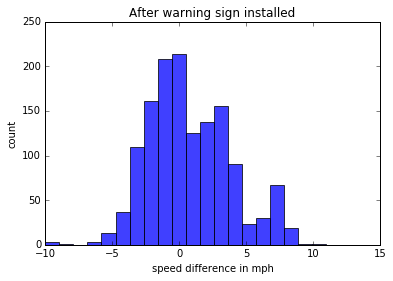

In [19]:

fig, ax = plt.subplots()

ax.set_title('After warning sign installed')
ax.set_xlabel('speed difference in mph')
ax.set_ylabel('count')
a=ax.hist(tidyDf.SbjBefore - tidyDf.SbjAfter, bins=20,alpha=0.75)


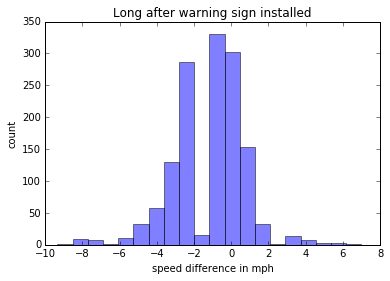

In [20]:
fig, ax = plt.subplots()

ax.set_title('Long after warning sign installed')
ax.set_xlabel('speed difference in mph')
ax.set_ylabel('count')
a=ax.hist(tidyDf.SbjBefore - tidyDf.SbjLongAfter, bins=20,alpha=0.5)

## And we look at the scatter plots

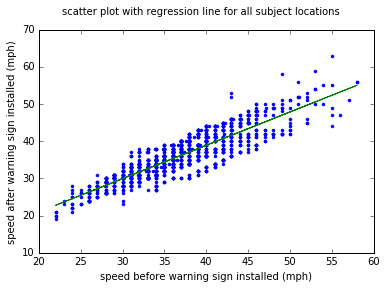

slope of regression line:  0.8958181592340537


In [21]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
b, m = polyfit(tidyDf.SbjBefore,tidyDf.SbjAfter, 1)

fig=plt.figure()
fig.suptitle('scatter plot with regression line for all subject locations')
plt.xlabel('speed before warning sign installed (mph)')
plt.ylabel('speed after warning sign installed (mph)')
plt.plot(tidyDf.SbjBefore,tidyDf.SbjAfter, '.')
plt.plot(tidyDf.SbjBefore, b + m * tidyDf.SbjBefore, '-')
plt.show()
print("slope of regression line: ",m)


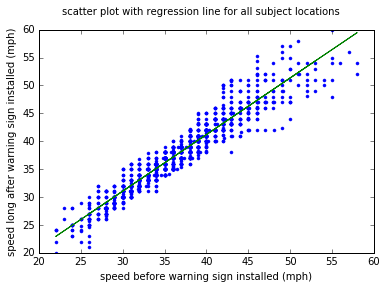

slope of regression line:  1.0142353114232137


In [22]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
b, m = polyfit(tidyDf.SbjBefore,tidyDf.SbjLongAfter, 1)

fig=plt.figure()
fig.suptitle('scatter plot with regression line for all subject locations')
plt.xlabel('speed before warning sign installed (mph)')
plt.ylabel('speed long after warning sign installed (mph)')
plt.plot(tidyDf.SbjBefore,tidyDf.SbjLongAfter, '.')
plt.plot(tidyDf.SbjBefore, b + m * tidyDf.SbjBefore, '-')
plt.show()
print("slope of regression line: ",m)

## For good measure, we apply t-tests

In [23]:
t,p=stats.ttest_ind(tidyDf.SbjBefore,tidyDf.SbjAfter,equal_var=True)
print('t-test All locations: speed before : speed after',t,p)

t,p=stats.ttest_ind(tidyDf.SbjBefore,tidyDf.SbjLongAfter,equal_var=True)
print('t-test All locations: speed before : speed long after',t,p)

t-test All locations: speed before : speed after 3.237694499415174 0.001219074657670658
t-test All locations: speed before : speed long after -4.86252719328852 1.2230391456197594e-06


#### Look at the mean, std, and quantiles for each location pair

In [24]:
for p in range(1,15):
   print(tidyDf[tidyDf.pair==p].describe())
   print()

        pair   SbjBefore    SbjAfter  SbjLongAfter   CtlBefore    CtlAfter  \
count  100.0  100.000000  100.000000    100.000000  100.000000  100.000000   
mean     1.0   34.530000   36.030303     34.797980   34.170000   38.650000   
std      0.0    5.014031    5.112554      5.093457    5.301143    5.485288   
min      1.0   26.000000   26.000000     21.000000   21.000000   28.000000   
25%      1.0   31.000000   32.000000     31.939394   31.000000   35.000000   
50%      1.0   34.000000   35.752525     34.247475   34.000000   38.000000   
75%      1.0   37.250000   39.060606     37.060606   37.000000   42.250000   
max      1.0   49.000000   51.000000     51.000000   51.000000   56.000000   

       CtlLongAfter  
count    100.000000  
mean      36.260000  
std        5.582476  
min       24.000000  
25%       32.750000  
50%       35.000000  
75%       40.000000  
max       54.000000  

        pair   SbjBefore    SbjAfter  SbjLongAfter   CtlBefore    CtlAfter  \
count  100.0  100.00

        pair   SbjBefore   SbjAfter  SbjLongAfter   CtlBefore    CtlAfter  \
count  100.0  100.000000  100.00000    100.000000  100.000000  100.000000   
mean    12.0   38.570000   35.30000     40.650000   40.860000   43.520000   
std      0.0    6.567836    5.31531      5.977018    5.316299    5.198057   
min     12.0   25.000000   25.00000     29.000000   30.000000   32.000000   
25%     12.0   34.000000   31.00000     36.000000   37.000000   39.000000   
50%     12.0   38.000000   35.00000     39.500000   40.000000   43.000000   
75%     12.0   42.250000   39.00000     45.000000   44.000000   47.000000   
max     12.0   58.000000   56.00000     54.000000   54.000000   57.000000   

       CtlLongAfter  
count    100.000000  
mean      43.080000  
std        5.347859  
min       30.000000  
25%       39.000000  
50%       43.000000  
75%       47.000000  
max       56.000000  

        pair   SbjBefore  SbjAfter  SbjLongAfter   CtlBefore    CtlAfter  \
count  100.0  100.000000  100.0